<a href="https://colab.research.google.com/github/Caik99/Research/blob/main/implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import auc, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import colorcet as cc
from sklearn.manifold import TSNE
import os

seed = 42

In [ ]:
# Load and display data
original_data = pd.read_csv("/content/DATA_SET.csv")
data = original_data.copy()
display(data.head(2))

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,Category
0,P2P-Worm.Win32.Palevo.bhnc-ad71644f5eb93992d8d...,23117,144,3,0,4,0,65535,0,184,...,1073741888,114,8,0,0,109300,0,0,0,Worms
1,P2P-Worm.Win32.Palevo.bhnc-add453e0e5524422976...,23117,144,3,0,4,0,65535,0,184,...,1073741888,101,6,0,0,75628,94208,0,0,Worms


In [ ]:
# Drop the 'Name' column
data = data.drop('Name', axis=1)
data.head(2)

# Removing duplicate Rows
display(data['Category'].value_counts())

duplicate_rows = data.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())
data.drop_duplicates(inplace=True)
print("Number of duplicate rows after removal:", data.duplicated().sum())

display(data['Category'].value_counts())


,count
Category,
Benign,19504
Ransomware,9625
Trojan,7187
Worms,5714
Spyware,3432
Virus,2845


Number of duplicate rows: 13646
Number of duplicate rows after removal: 0


,count
Category,
Benign,15405
Trojan,5781
Ransomware,5781
Worms,4650
Virus,2187
Spyware,857


In [ ]:

# Describe data
display(data.describe())


target = data['Category']
data = data.drop('Category', axis=1)
# Drop columns with standard deviation of 0
data = data.drop(labels=data.loc[:, data.std() == 0].columns, axis=1)

display(data.describe())

data = pd.concat([data, target], axis=1)

data.head()
data.to_csv('Cleandata.csv', index=False)


,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,34661.0,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,...,3.466100e+04,3.466100e+04,34661.000000,34661.000000,34661.000000,3.466100e+04,3.466100e+04,3.466100e+04,3.466100e+04,3.466100e+04
mean,23117.0,264.064684,116.648048,109.848504,101.004587,103.326448,61114.704740,58.830876,300.139119,139.967110,...,3.090840e+09,1.208942e+09,119.771934,5.201177,81.828857,4.648725e+05,9.394814e+05,8.706042e+05,5.082162e+05,1.284907e+06
std,0.0,2054.204495,1898.349946,1847.010925,1757.334156,1803.778478,16261.496012,1635.205467,2124.347960,2254.050736,...,6.837210e+08,6.511066e+08,217.591834,8.295495,701.947312,1.339376e+07,6.753438e+06,4.717950e+06,2.293427e+07,3.528039e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.073742e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,3.221226e+09,1.073742e+09,17.000000,1.000000,0.000000,0.000000e+00,3.686400e+04,2.457600e+04,0.000000e+00,0.000000e+00
50%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,3.221226e+09,1.073742e+09,63.000000,4.000000,0.000000,0.000000e+00,1.555200e+05,1.351680e+05,0.000000e+00,0.000000e+00
75%,23117.0,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,...,3.227517e+09,1.076888e+09,152.000000,7.000000,1.000000,1.436800e+04,5.283840e+05,4.997120e+05,0.000000e+00,0.000000e+00
max,23117.0,62868.000000,65348.000000,65280.000000,65445.000000,65433.000000,65535.000000,65520.000000,65534.000000,65188.000000,...,4.261413e+09,4.026532e+09,8049.000000,497.000000,24260.000000,2.415919e+09,8.353950e+08,5.368996e+08,2.906159e+09,3.190713e+09


,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,34661.000000,...,3.466100e+04,3.466100e+04,34661.000000,34661.000000,34661.000000,3.466100e+04,3.466100e+04,3.466100e+04,3.466100e+04,3.466100e+04
mean,264.064684,116.648048,109.848504,101.004587,103.326448,61114.704740,58.830876,300.139119,139.967110,194.620698,...,3.090840e+09,1.208942e+09,119.771934,5.201177,81.828857,4.648725e+05,9.394814e+05,8.706042e+05,5.082162e+05,1.284907e+06
std,2054.204495,1898.349946,1847.010925,1757.334156,1803.778478,16261.496012,1635.205467,2124.347960,2254.050736,2230.185442,...,6.837210e+08,6.511066e+08,217.591834,8.295495,701.947312,1.339376e+07,6.753438e+06,4.717950e+06,2.293427e+07,3.528039e+07
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.073742e+09,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,0.000000,...,3.221226e+09,1.073742e+09,17.000000,1.000000,0.000000,0.000000e+00,3.686400e+04,2.457600e+04,0.000000e+00,0.000000e+00
50%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,0.000000,...,3.221226e+09,1.073742e+09,63.000000,4.000000,0.000000,0.000000e+00,1.555200e+05,1.351680e+05,0.000000e+00,0.000000e+00
75%,144.000000,3.000000,0.000000,4.000000,0.000000,65535.000000,0.000000,184.000000,0.000000,0.000000,...,3.227517e+09,1.076888e+09,152.000000,7.000000,1.000000,1.436800e+04,5.283840e+05,4.997120e+05,0.000000e+00,0.000000e+00
max,62868.000000,65348.000000,65280.000000,65445.000000,65433.000000,65535.000000,65520.000000,65534.000000,65188.000000,65452.000000,...,4.261413e+09,4.026532e+09,8049.000000,497.000000,24260.000000,2.415919e+09,8.353950e+08,5.368996e+08,2.906159e+09,3.190713e+09


In [ ]:

data = pd.read_csv("Cleandata.csv")

# Encode labels using LabelEncoder
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

# Store class names for later use
class_names = label_encoder.classes_

data.head()

,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,...,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity,Category
0,144,3,0,4,0,65535,0,184,0,0,...,1073741888,114,8,0,0,109300,0,0,0,5
1,144,3,0,4,0,65535,0,184,0,0,...,1073741888,101,6,0,0,75628,94208,0,0,5
2,144,3,0,4,0,65535,0,184,0,0,...,1073741888,150,10,0,0,124036,0,0,0,5
3,144,3,0,4,0,65535,0,184,0,0,...,1073741888,101,6,0,0,75596,94208,0,0,5
4,144,3,0,4,0,65535,0,184,0,0,...,1073741888,101,6,0,0,75612,94208,0,0,5


<h1><center>Visulazation!</center></h1>                                               

        

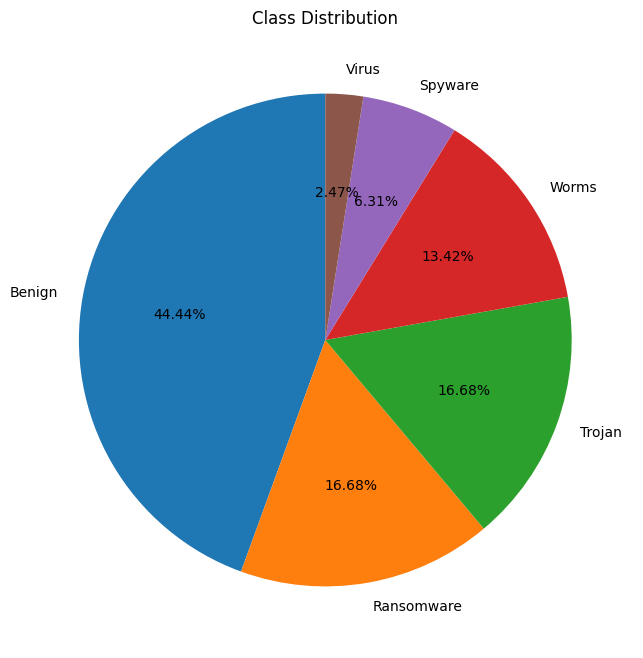

In [ ]:
import matplotlib.pyplot as plt

# Data for categories
categories = ['Benign', 'Ransomware', 'Trojan', 'Worms', 'Spyware', 'Virus']
Values = data['Category'].value_counts()
# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(Values, labels=categories, autopct='%1.2f%%', startangle=90 )

# Adding title
plt.title('Class Distribution')

# Display the pie chart
plt.savefig(f"Class_Distribution")


In [ ]:
data = data.groupby('Category').sample(frac=0.001, random_state=seed)
data.shape

(1732, 76)

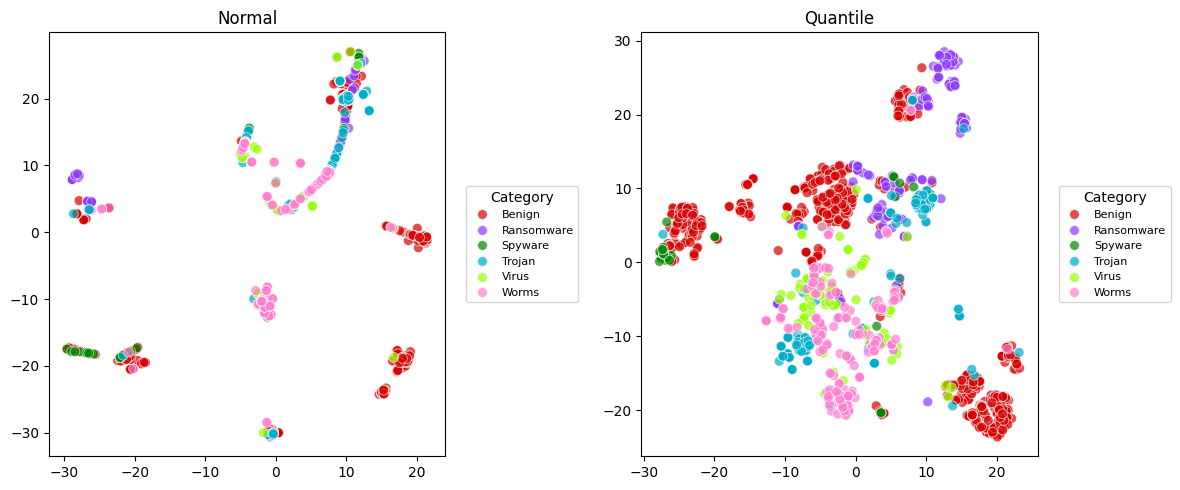

In [ ]:
# Separate features and target
X = data.drop('Category', axis=1)
y = data['Category']

# Define the pipelines
normal_pipeline = Pipeline([
    ('tsne', TSNE(n_components=2, learning_rate="auto", init="random",
                  perplexity=100, random_state=seed))
])

quantile_pipeline = Pipeline([
    ('quantile', QuantileTransformer(output_distribution='uniform', random_state=seed)),
    ('tsne', TSNE(n_components=2, learning_rate="auto", init="random",
                  perplexity=100, random_state=seed))
])

# Create a dictionary of pipelines
pipelines = {
    'Normal': normal_pipeline,
    'Quantile': quantile_pipeline
}

# Fit and transform the data using the pipelines
dataset_ciselatixat = {}
for name, pipeline in pipelines.items():
    dataset_ciselatixat[name] = pipeline.fit_transform(data.drop('Category', axis=1))

# Visualization
n_categories = len(np.unique(y))
palette = sns.color_palette(cc.glasbey, n_categories)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for i, (name, X) in enumerate(dataset_ciselatixat.items()):
    sns.scatterplot(x=X[:, 0],
                    y=X[:, 1],
                    hue=y,
                    ax=axs[i],
                    palette = palette,
                    s=50,
                    alpha=0.7,
                    legend='full')

    handles, labels = axs[i].get_legend_handles_labels()
    axs[i].legend(handles, class_names, title='Category', loc="center right",
                  bbox_to_anchor=(1.35, 0.5), prop={"size": 8})

    axs[i].set_title(name)

plt.tight_layout()
plt.savefig(f"Normal_VS_Quantile.png")

In [ ]:
# Save the preprocessed data for later feature selection
X_normal = data.drop('Category', axis=1)
X_quantile = pipelines['Quantile'].named_steps['quantile'].fit_transform(X_normal)
X_quantile = pd.DataFrame(X_quantile, columns=X_normal.columns)

# Now X_normal and X_quantile can be used for feature selection
datasets = {
    'Normal': X_normal,
    'Quantile': X_quantile,
}


 <h1><center>Featute Selection!</center></h1>                                               

In [ ]:

# Initialize dictionary to hold selected features
selected_features = {method: {} for method in ['Info Gain', 'Permutation Importance', 'Correlation Coefficient']}

# Define feature selection functions
def select_info_gain(X, y, num_features=15):
    info_gain = mutual_info_classif(X, y, random_state=seed)
    indices = np.argsort(info_gain)[-num_features:]
    return X.iloc[:, indices]

def select_permutation_importance(X, y, num_features=15):
    model = RandomForestClassifier(random_state=seed)
    model.fit(X, y)
    perm_importance = permutation_importance(model, X, y, random_state=seed)
    indices = np.argsort(perm_importance.importances_mean)[-num_features:]
    return X.iloc[:, indices]

def select_correlation_coefficient(X, y, num_features=15):
    data_with_target = pd.concat([X, y], axis=1)
    correlation_matrix = data_with_target.corr()
    correlation_with_target = correlation_matrix['Category'].drop('Category')
    indices = np.argsort(correlation_with_target.abs())[-num_features:]
    return X.iloc[:, indices]

# Apply feature selection methods
for dataset_name, X in datasets.items():
    selected_features['Info Gain'][dataset_name] = select_info_gain(X, y)
    selected_features['Permutation Importance'][dataset_name] = select_permutation_importance(X, y)
    selected_features['Correlation Coefficient'][dataset_name] = select_correlation_coefficient(X, y)

# Function to combine features
def combine_features(selected_features, dataset_name):
    # Get selected features from all methods
    info_gain_features = selected_features['Info Gain'][dataset_name]
    perm_import_features = selected_features['Permutation Importance'][dataset_name]
    corr_coeff_features = selected_features['Correlation Coefficient'][dataset_name]

    # Concatenate the features horizontally (axis=1)
    combined_features = pd.concat([info_gain_features, perm_import_features, corr_coeff_features], axis=1)

    # Remove duplicate columns (features)
    combined_features = combined_features.loc[:, ~combined_features.columns.duplicated()]

    return combined_features

# Combine and deduplicate features for each dataset
final_datasets = {}
for dataset_name in datasets.keys():
    final_datasets[dataset_name] = combine_features(selected_features, dataset_name)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: The behavior of Series.argsort in the presence of NA values is deprecated. In a future version, NA values will be ordered last instead of set to -1.
  return bound(*args, **kwds)


In [ ]:
# import pandas as pd

# def compare_and_print_features(datasets):
#     feature_sets = {name: set(df.columns) for name, df in datasets.items()}
#     common_features = set.intersection(*feature_sets.values())

#     for name, features in feature_sets.items():
#         print(f"Features in {name} dataset: {len(features)}")
#     print(f"Common features: {len(common_features)}")

#     print("\nCommon features:")
#     print(*sorted(common_features), sep='\n')

#     for name, features in feature_sets.items():
#         unique = features - common_features
#         print(f"\nUnique to {name} dataset ({len(unique)}):")
#         print(*sorted(unique), sep='\n')

# compare_and_print_features(final_datasets)

<h1><center>GridSearch!</center></h1>

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids for each model, including the ensemble
param_grids = {
    'KNN': {
        'n_neighbors': range(1, 30, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski','chebyshev'],
        'leaf_size': range(1, 50, 5)
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf','poly'],
        'gamma': ['scale'],
        'degree': [2]
    },
    'Decision Tree': {
        'max_depth': [2, 3, 5, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy']
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': range(10, 120, 10),
        'min_samples_split': [2, 6, 10],
        'min_samples_leaf': [1, 3, 4],
        'bootstrap': [True, False]
    },
    'Naive Bayes': {
        'var_smoothing': np.logspace(0, -9, num=100)
    },
    # Ensemble Model hyperparameter grid (using only 'soft' voting)
    'Ensemble': {
        'voting': ['soft'],
        'weights': [(1, 1, 1, 1, 1), (2, 1, 1, 1, 1), (1, 2, 1, 1, 1), (1, 1, 2, 1, 1), (1, 1, 1, 2, 1),(1, 1, 1, 1, 2)]
        # 'weights': [(1, 1, 1, 1), (2, 1, 1, 1), (1, 2, 1, 1), (1, 1, 2, 1), (1, 1, 1, 2)]
    }
}

# Initialize individual models
base_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=seed),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=seed),
    'SVM': SVC(probability=True, random_state=seed)
}

from sklearn.model_selection import RepeatedStratifiedKFold

# Initialize models with GridSearchCV
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=seed)


In [ ]:
def create_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

<h1><center>EVALUATION METHOD!</center></h1>

In [ ]:
def evaluate_model(model, X_test, y_test, dataset_name, model_name, ax_roc=None, ax_cm=None):
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # ROC curve
    if ax_roc is not None and hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
        for i in range(len(np.unique(y_test))):
            fpr, tpr, _ = roc_curve(y_test == i, y_score[:, i])
            roc_auc = auc(fpr, tpr)
            ax_roc.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

        ax_roc.set_xlabel('False Positive Rate')
        ax_roc.set_ylabel('True Positive Rate')
        ax_roc.set_title(f'{model_name} ROC Curve - {dataset_name}')
        ax_roc.legend(loc='lower right')

        overall_roc_auc = roc_auc_score(y_test, y_score, multi_class='ovo')
    else:
        overall_roc_auc = 'N/A'

    # Confusion matrix
    if ax_cm is not None:
        cm = confusion_matrix(y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
        disp.plot(ax=ax_cm, xticks_rotation='vertical', cmap='Blues')
        ax_cm.set_title(f'{model_name} Confusion Matrix - {dataset_name}')

    return recall, precision, f1, accuracy, overall_roc_auc


In [ ]:

def evaluate_datasets(datasets, base_models, param_grids, cv, output_dir):
    all_results = {}

    for dataset_name, X in datasets.items():
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, stratify=y)

        for smote_status in ['No SMOTE', 'SMOTE']:
            results = {}

            if smote_status == 'SMOTE':
                smote = SMOTE(random_state=seed)
                X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
            else:
                X_train_resampled, y_train_resampled = X_train, y_train

            # Tune and save individual models
            tuned_models = {}
            for model_name, model in base_models.items():
                try:
                    grid_search = GridSearchCV(model, param_grids[model_name], cv=cv, scoring='accuracy', error_score='raise', n_jobs=-1)
                    grid_search.fit(X_train_resampled, y_train_resampled)
                    best_model = grid_search.best_estimator_
                    tuned_models[model_name] = best_model

                    print(f"{model_name}_{dataset_name}_{smote_status} Best Parameters:\n", grid_search.best_params_)

                except Exception as e:
                    print(f"Error with model {model_name} on dataset {dataset_name} ({smote_status}): {e}")

            # Create and tune the Ensemble model
            tuned_model_list = [(name, model) for name, model in tuned_models.items()]
            ensemble = VotingClassifier(estimators=tuned_model_list)
            ensemble_cv = GridSearchCV(ensemble, param_grids['Ensemble'], cv=cv, scoring='accuracy', error_score='raise', n_jobs=-1)
            ensemble_cv.fit(X_train_resampled, y_train_resampled)
            best_ensemble = ensemble_cv.best_estimator_

            print(f"Ensemble_{dataset_name}_{smote_status} Best Parameters:\n", ensemble_cv.best_params_)

            # Create separate figures for ROC curves and Confusion Matrices
            fig_roc, axs_roc = plt.subplots(2, 3, figsize=(20, 12))
            fig_cm, axs_cm = plt.subplots(2, 3, figsize=(20, 12))

            # Evaluate all models including the Ensemble
            for i, (model_name, model) in enumerate(list(tuned_models.items()) + [('Ensemble', best_ensemble)]):
                try:
                    ax_roc = axs_roc[i // 3, i % 3]
                    ax_cm = axs_cm[i // 3, i % 3]

                    recall, precision, f1, accuracy, roc_auc = evaluate_model(model, X_test, y_test, f"{dataset_name} ({smote_status})", model_name, ax_roc, ax_cm)
                    results[model_name] = {'Recall': recall, 'Precision': precision, 'F1-Score': f1, 'Accuracy': accuracy, 'ROC AUC': roc_auc}

                except Exception as e:
                    print(f"Error evaluating model {model_name} on dataset {dataset_name} ({smote_status}): {e}")

            # Adjust layout and save figures
            fig_roc.tight_layout()
            fig_roc.savefig(os.path.join(output_dir, f'ROC_Curves_{dataset_name}_{smote_status}.png'))
            plt.close(fig_roc)

            fig_cm.tight_layout()
            fig_cm.savefig(os.path.join(output_dir, f'Confusion_Matrices_{dataset_name}_{smote_status}.png'))
            plt.close(fig_cm)

            all_results[f'{dataset_name} - {smote_status}'] = results

    return all_results


In [ ]:

# Create directories for saving results
base_output_dir = 'evaluation_results'
create_directory(base_output_dir)

# Evaluate final datasets
final_output_dir = os.path.join(base_output_dir, 'final_datasets')
create_directory(final_output_dir)
final_results = evaluate_datasets(final_datasets, base_models, param_grids, cv, final_output_dir)


Decision Tree_Normal_No SMOTE Best Parameters:
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Naive Bayes_Normal_No SMOTE Best Parameters:
 {'var_smoothing': 0.0023101297000831605}
KNN_Normal_No SMOTE Best Parameters:
 {'leaf_size': 1, 'metric': 'chebyshev', 'n_neighbors': 1, 'weights': 'uniform'}
Random Forest_Normal_No SMOTE Best Parameters:
 {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 200}
SVM_Normal_No SMOTE Best Parameters:
 {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Ensemble_Normal_No SMOTE Best Parameters:
 {'voting': 'soft', 'weights': (1, 1, 1, 2, 1)}


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree_Normal_SMOTE Best Parameters:
 {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Naive Bayes_Normal_SMOTE Best Parameters:
 {'var_smoothing': 0.008111308307896872}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KNN_Normal_SMOTE Best Parameters:
 {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest_Normal_SMOTE Best Parameters:
 {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
SVM_Normal_SMOTE Best Parameters:
 {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Ensemble_Normal_SMOTE Best Parameters:
 {'voting': 'soft', 'weights': (1, 1, 1, 2, 1)}
Decision Tree_Quantile_No SMOTE Best Parameters:
 {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Naive Bayes_Quantile_No SMOTE Best Parameters:
 {'var_smoothing': 0.03511191734215131}
KNN_Quantile_No SMOTE Best Parameters:
 {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Random Forest_Quantile_No SMOTE Best Parameters:
 {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
SVM_Quantile_No SMOTE Best Parameters:
 {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}
Ensemble_Quantile_No SMOTE Best Parameters:
 {'voting': 'soft', 'weights': (1, 1, 1, 2, 1)}
Decision Tree_Quantile_SMOTE Best Parameters:
 {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Naive Bayes_Quantile_SMOTE Best Parameters:
 {'var_smoothing': 0.005336699231206307}


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


KNN_Quantile_SMOTE Best Parameters:
 {'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


In [ ]:

# Display results for final datasets
for dataset_name, results in final_results.items():
    print(f"Results for {dataset_name}:")
    results_df = pd.DataFrame(results).T
    display(results_df)


In [ ]:

# Evaluate feature selection datasets
feature_selection_results = {}
for method, datasets in selected_features.items():
    method_output_dir = os.path.join(base_output_dir, f'feature_selection_{method}')
    create_directory(method_output_dir)
    feature_selection_results[method] = evaluate_datasets(datasets, base_models, param_grids, cv, method_output_dir)


In [ ]:

# Display results for feature selection datasets
for method, results in feature_selection_results.items():
    print(f"\nResults for {method} feature selection:")
    for dataset_name, dataset_results in results.items():
        print(f"\nResults for {dataset_name}:")
        results_df = pd.DataFrame(dataset_results).T
        display(results_df)